In [ ]:
!pip install kaggle
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/ #upload your own kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


# Step 1: Data collection

In [ ]:
!kaggle datasets download gauthamp10/google-playstore-apps

 96% 199M/207M [00:01<00:00, 149MB/s]
100% 207M/207M [00:01<00:00, 138MB/s]


In [ ]:
!unzip google-playstore-apps.zip

Archive:  google-playstore-apps.zip
  inflating: Google-Playstore.csv    


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re #for calculating expression

# Step 2: Data Cleaning

## Looking at the data

In [ ]:
apps_data = pd.read_csv("Google-Playstore.csv")

In [ ]:
apps_data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [ ]:
apps_data.loc[apps_data.Currency != 'USD'].loc[apps_data.Price>0]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time


In [ ]:
apps_data.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [ ]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [ ]:
apps_data.nunique()

App Name             2177944
App Id               2312944
Category                  48
Rating                    42
Rating Count           38482
Installs                  22
Minimum Installs          22
Maximum Installs      251563
Free                       2
Price                   1063
Currency                  15
Size                    1657
Minimum Android          154
Developer Id          758371
Developer Website     810440
Developer Email       950456
Released                4158
Last Updated            3918
Content Rating             6
Privacy Policy        977743
Ad Supported               2
In App Purchases           2
Editors Choice             2
Scraped Time           67374
dtype: int64

In [ ]:
apps_data.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

## Dealing with different attributes

1. **'App Name'** is required.
2. We can drop 'App Id' sice it will not be useful in my project.
3. **'Category'** is needed.
4. **'Rating' and 'Rating count'** both are needed.
5. There are three attributes for the intalls - 'Installs','Minimum Installs' and 'Maximum Installs'. Since Installs and minimum installs have both 22 unique values and maximum installs have 251563 unique values I will take **'Maximum Installs'** So that I can perforn regression on installs.
6. **'Free'** attribute is required.
7. **'Price'** is required.
8. I can take **'Currency'** to find different demographics.
9. **'Size'** is required.
10. **'Minimum Android'** is required
11. I will only take **'Developer Id'** to get impact of developers.
12. There are two attributes **'Released' and 'Srapped Time'**, I will count **number of days** since released time.
13. I will take **'Last Update' since convert it to bool**.
14. **'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'** all are required.

## Dropping Attributes

Changing space between attribute names

In [ ]:
apps_data.columns = apps_data.columns.str.replace(' ', '_')

In [ ]:
apps_data.columns

Index(['App_Name', 'App_Id', 'Category', 'Rating', 'Rating_Count', 'Installs',
       'Minimum_Installs', 'Maximum_Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum_Android', 'Developer_Id', 'Developer_Website',
       'Developer_Email', 'Released', 'Last_Updated', 'Content_Rating',
       'Privacy_Policy', 'Ad_Supported', 'In_App_Purchases', 'Editors_Choice',
       'Scraped_Time'],
      dtype='object')

In [ ]:
apps_data = apps_data.drop(['App_Id','Installs','Minimum_Installs','Developer_Website','Developer_Email','Privacy_Policy'], axis=1)

In [ ]:
apps_data.columns

Index(['App_Name', 'Category', 'Rating', 'Rating_Count', 'Maximum_Installs',
       'Free', 'Price', 'Currency', 'Size', 'Minimum_Android', 'Developer_Id',
       'Released', 'Last_Updated', 'Content_Rating', 'Ad_Supported',
       'In_App_Purchases', 'Editors_Choice', 'Scraped_Time'],
      dtype='object')

## Tackling App_Name

In [ ]:
len(apps_data)

2312944

In [ ]:
apps_data.App_Name.isnull().sum()

2

Since there are two rows having null App_Name I am dropping them

In [ ]:
apps_data = apps_data[apps_data['App_Name'].notna()]

In [ ]:
apps_data.App_Name.isnull().sum()

0

In [ ]:
len(apps_data.App_Name.unique())

2177944

In [ ]:
len(apps_data)

2312942

In [ ]:
apps_data[apps_data.App_Name.duplicated()]

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Scraped_Time
2377,Bhagavad Gita in English,Books & Reference,0.0,0.0,51,True,0.00,XXX,9.9M,4.4 and up,Cipher SoftTech,"Dec 25, 2020","Dec 25, 2020",Everyone,True,False,False,2021-06-15 20:21:53
2562,Mancala,Board,4.3,886.0,147049,True,0.00,USD,22M,4.1 and up,Mancala & Oware Games,"Nov 22, 2019","Jul 24, 2020",Everyone,True,False,False,2021-06-15 20:22:03
3339,Gallery,Tools,4.5,708.0,173245,True,0.00,USD,6.9M,4.4 and up,Photo gallery and Simple gallery lite,"Jan 2, 2021","Jun 07, 2021",Everyone,True,False,False,2021-06-15 20:22:48
4642,Age Calculator,Productivity,4.5,53.0,11228,True,0.00,USD,629k,2.3 and up,NSTechFrame,"Jan 2, 2015","Feb 12, 2015",Everyone,False,False,False,2021-06-15 20:24:03
4771,Vacuum Cleaner Sound,Music & Audio,0.0,0.0,26,False,2.49,USD,2.3M,2.3.3 and up,Animated Oak Entertainment Ltd,"Jan 11, 2016","Jan 11, 2016",Everyone,False,False,False,2021-06-15 20:24:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312930,PAX,Travel & Local,3.3,7.0,388,True,0.00,USD,22M,4.4 and up,Apreciasoft Software,"Sep 2, 2019","Nov 26, 2020",Everyone,False,False,False,2021-06-16 12:59:18
2312934,Vietnamese - English Translator,Education,0.0,0.0,6,True,0.00,USD,3.6M,4.0 and up,Eliminates Apps,"Jun 15, 2020","Aug 31, 2020",Everyone,True,False,False,2021-06-16 12:59:18
2312935,Floral Wallpaper,Personalization,0.0,0.0,1302,True,0.00,USD,29M,4.1 and up,arfdev,"Jul 19, 2018","Nov 13, 2019",Everyone,True,False,False,2021-06-16 12:59:18
2312941,Data Structure,Education,0.0,0.0,202,True,0.00,USD,29M,5.0 and up,appoworld,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False,2021-06-16 12:59:19


In [ ]:
len(apps_data[apps_data.duplicated(subset=['App_Name','Scraped_Time'])])

16

There are some duplicate app names. Lets drop them.

In [ ]:
apps_data = apps_data.drop_duplicates(subset=['App_Name'])

In [ ]:
apps_data[apps_data.App_Name.duplicated()]

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Scraped_Time


In [ ]:
len(apps_data)

2177944

## Tackling Category

In [ ]:
apps_data.Category.value_counts()

Education                  227982
Music & Audio              145619
Business                   140381
Tools                      131878
Entertainment              128555
Lifestyle                  111836
Books & Reference          107601
Health & Fitness            79807
Personalization             76996
Productivity                75388
Shopping                    73524
Food & Drink                71151
Travel & Local              65764
Finance                     62904
Arcade                      49182
Casual                      46911
Puzzle                      46509
Communication               46318
Sports                      46130
Social                      42468
News & Magazines            41063
Medical                     31248
Photography                 29990
Action                      26426
Maps & Navigation           25937
Simulation                  22627
Adventure                   22315
Educational                 20230
Auto & Vehicles             17747
Art & Design  

In [ ]:
print(np.sort(apps_data.Category.unique()))

['Action' 'Adventure' 'Arcade' 'Art & Design' 'Auto & Vehicles' 'Beauty'
 'Board' 'Books & Reference' 'Business' 'Card' 'Casino' 'Casual' 'Comics'
 'Communication' 'Dating' 'Education' 'Educational' 'Entertainment'
 'Events' 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Maps & Navigation' 'Medical' 'Music'
 'Music & Audio' 'News & Magazines' 'Parenting' 'Personalization'
 'Photography' 'Productivity' 'Puzzle' 'Racing' 'Role Playing' 'Shopping'
 'Simulation' 'Social' 'Sports' 'Strategy' 'Tools' 'Travel & Local'
 'Trivia' 'Video Players & Editors' 'Weather' 'Word']


1. Education and Educational are similar.
2. Music and Music & Audio are similar

In [ ]:
apps_data.loc[apps_data.Category == 'Educational','Category'] = 'Education'

In [ ]:
apps_data.loc[apps_data.Category == 'Music','Category'] = 'Music & Audio'

In [ ]:
print(np.sort(apps_data.Category.unique()))

['Action' 'Adventure' 'Arcade' 'Art & Design' 'Auto & Vehicles' 'Beauty'
 'Board' 'Books & Reference' 'Business' 'Card' 'Casino' 'Casual' 'Comics'
 'Communication' 'Dating' 'Education' 'Entertainment' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Maps & Navigation' 'Medical' 'Music & Audio'
 'News & Magazines' 'Parenting' 'Personalization' 'Photography'
 'Productivity' 'Puzzle' 'Racing' 'Role Playing' 'Shopping' 'Simulation'
 'Social' 'Sports' 'Strategy' 'Tools' 'Travel & Local' 'Trivia'
 'Video Players & Editors' 'Weather' 'Word']


In [ ]:
apps_data.Category.value_counts()

Education                  248212
Music & Audio              149692
Business                   140381
Tools                      131878
Entertainment              128555
Lifestyle                  111836
Books & Reference          107601
Health & Fitness            79807
Personalization             76996
Productivity                75388
Shopping                    73524
Food & Drink                71151
Travel & Local              65764
Finance                     62904
Arcade                      49182
Casual                      46911
Puzzle                      46509
Communication               46318
Sports                      46130
Social                      42468
News & Magazines            41063
Medical                     31248
Photography                 29990
Action                      26426
Maps & Navigation           25937
Simulation                  22627
Adventure                   22315
Auto & Vehicles             17747
Art & Design                16872
House & Home  

In [ ]:
apps_data.Category.isnull().sum()

0

There is no null value

In [ ]:
print(len(apps_data),len(apps_data.Category))

2177944 2177944


In [ ]:
apps_data.Category = apps_data.Category.astype('category')

In [ ]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177944 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype   
---  ------            -----   
 0   App_Name          object  
 1   Category          category
 2   Rating            float64 
 3   Rating_Count      float64 
 4   Maximum_Installs  int64   
 5   Free              bool    
 6   Price             float64 
 7   Currency          object  
 8   Size              object  
 9   Minimum_Android   object  
 10  Developer_Id      object  
 11  Released          object  
 12  Last_Updated      object  
 13  Content_Rating    object  
 14  Ad_Supported      bool    
 15  In_App_Purchases  bool    
 16  Editors_Choice    bool    
 17  Scraped_Time      object  
dtypes: bool(4), category(1), float64(3), int64(1), object(9)
memory usage: 243.0+ MB


## Tackling Rating

In [ ]:
apps_data[apps_data.Rating>5]

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Scraped_Time


In [ ]:
apps_data[apps_data.Rating<0]

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Scraped_Time


In [ ]:
apps_data.Rating.unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [ ]:
apps_data.Rating.isnull().sum()

21568

In [ ]:
apps_data.Rating.describe()

count    2.156376e+06
mean     2.193655e+00
std      2.106109e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.900000e+00
75%      4.300000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [ ]:
apps_data.Rating.value_counts()

0.0    1002064
5.0      95179
4.2      81496
4.4      79931
4.3      77099
4.6      73196
4.5      71327
4.1      64758
4.0      62747
4.7      58512
4.8      57877
3.9      51783
3.8      50395
4.9      42320
3.7      40639
3.6      33861
3.5      29930
3.4      27294
3.3      21414
3.2      20387
3.0      16444
3.1      14828
2.8      11680
2.9      10977
2.7       8803
2.6       8800
2.5       6673
2.4       5805
2.3       5224
2.2       4778
2.0       3649
2.1       3556
1.8       2880
1.9       2503
1.7       1873
1.6       1592
1.5       1130
1.4        975
1.0        690
1.3        563
1.2        518
1.1        226
Name: Rating, dtype: int64

Since 0.0 has maximum counts I am filling null values with 0.0

In [ ]:
apps_data.Rating = apps_data.Rating.fillna(0)

In [ ]:
apps_data.Rating.isnull().sum()

0

In [ ]:
apps_data.Rating.unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9, 1.7,
       1.6, 1. , 1.1])

## Tackling Rating_Conunt

In [ ]:
apps_data.Rating_Count.describe()

count    2.156376e+06
mean     2.848836e+03
std      2.175644e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+00
75%      4.100000e+01
max      1.385576e+08
Name: Rating_Count, dtype: float64

In [ ]:
apps_data.Rating_Count.isnull().sum()

21568

Since 25% of ratings are 0 then filling null values with 0

In [ ]:
apps_data.Rating_Count = apps_data.Rating_Count.fillna(0)

In [ ]:
apps_data.Rating_Count.isnull().sum()

0

In [ ]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177944 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype   
---  ------            -----   
 0   App_Name          object  
 1   Category          category
 2   Rating            float64 
 3   Rating_Count      float64 
 4   Maximum_Installs  int64   
 5   Free              bool    
 6   Price             float64 
 7   Currency          object  
 8   Size              object  
 9   Minimum_Android   object  
 10  Developer_Id      object  
 11  Released          object  
 12  Last_Updated      object  
 13  Content_Rating    object  
 14  Ad_Supported      bool    
 15  In_App_Purchases  bool    
 16  Editors_Choice    bool    
 17  Scraped_Time      object  
dtypes: bool(4), category(1), float64(3), int64(1), object(9)
memory usage: 243.0+ MB


## Tackling Maximum installs, Free and Price

In [ ]:
apps_data.isnull().sum()

App_Name                0
Category                0
Rating                  0
Rating_Count            0
Maximum_Installs        0
Free                    0
Price                   0
Currency              135
Size                  177
Minimum_Android      6241
Developer_Id           33
Released            68607
Last_Updated            0
Content_Rating          0
Ad_Supported            0
In_App_Purchases        0
Editors_Choice          0
Scraped_Time            0
dtype: int64

In [ ]:
apps_data.Free.unique()

array([ True, False])

since Maximum installs, Free and Price don't have any null values and Free has only True and false I don't need any change

## Tackling Currency

In [ ]:
apps_data.Currency.describe()

count     2177809
unique         14
top           USD
freq      2176585
Name: Currency, dtype: object

In [ ]:
apps_data.Currency.value_counts()

USD    2176585
XXX       1200
EUR          6
INR          5
GBP          3
CAD          2
AUD          1
BRL          1
KRW          1
PKR          1
SGD          1
TRY          1
VND          1
ZAR          1
Name: Currency, dtype: int64

In [ ]:
apps_data.Currency.unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', nan, 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [ ]:
apps_data.Currency.isnull().sum()

135

Filling null with USD

In [ ]:
apps_data.Currency = apps_data.Currency.fillna('USD')

In [ ]:
apps_data.Currency.value_counts()

USD    2176720
XXX       1200
EUR          6
INR          5
GBP          3
CAD          2
AUD          1
BRL          1
KRW          1
PKR          1
SGD          1
TRY          1
VND          1
ZAR          1
Name: Currency, dtype: int64

In [ ]:
apps_data.Currency.unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [ ]:
apps_data.Currency.isnull().sum()

0

In [ ]:
apps_data.Currency = apps_data.Currency.astype('category')

In [ ]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177944 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype   
---  ------            -----   
 0   App_Name          object  
 1   Category          category
 2   Rating            float64 
 3   Rating_Count      float64 
 4   Maximum_Installs  int64   
 5   Free              bool    
 6   Price             float64 
 7   Currency          category
 8   Size              object  
 9   Minimum_Android   object  
 10  Developer_Id      object  
 11  Released          object  
 12  Last_Updated      object  
 13  Content_Rating    object  
 14  Ad_Supported      bool    
 15  In_App_Purchases  bool    
 16  Editors_Choice    bool    
 17  Scraped_Time      object  
dtypes: bool(4), category(2), float64(3), int64(1), object(8)
memory usage: 228.5+ MB


## Tackling Size

In [ ]:
apps_data.Size

0           10M
1          2.9M
2          3.7M
3          1.8M
4          6.2M
           ... 
2312937    6.6M
2312938     10M
2312939     77M
2312940     44M
2312943    5.2M
Name: Size, Length: 2177944, dtype: object

There are M,k,G so converting M and G to k

In [ ]:
apps_data.Size = apps_data.Size.str.replace('M','*1024')
apps_data.Size = apps_data.Size.str.replace('G','*1048576')
apps_data.Size = apps_data.Size.str.replace('k','*1')

In [ ]:
apps_data.Size

0           10*1024
1          2.9*1024
2          3.7*1024
3          1.8*1024
4          6.2*1024
             ...   
2312937    6.6*1024
2312938     10*1024
2312939     77*1024
2312940     44*1024
2312943    5.2*1024
Name: Size, Length: 2177944, dtype: object

In [ ]:
apps_data.Size.describe()

count                2177767
unique                  1656
top       Varies with device
freq                   71192
Name: Size, dtype: object

In [ ]:
modified_size = []
for size in apps_data.Size:
  if isinstance(size,float):
    modified_size.append(size)
    continue
  size = size.replace(',','')
  if size != "Varies with device":
    size = eval(size)
  else:
    size = None
  modified_size.append(size)

In [ ]:
apps_data.Size = modified_size

In [ ]:
len(apps_data[apps_data.Size=="Varies with device"])

0

In [ ]:
apps_data.Size 

0          10240.0
1           2969.6
2           3788.8
3           1843.2
4           6348.8
            ...   
2312937     6758.4
2312938    10240.0
2312939    78848.0
2312940    45056.0
2312943     5324.8
Name: Size, Length: 2177944, dtype: float64

Lets add mean size In varies with device

In [ ]:
apps_data.Size.isnull().sum()

71369

In [ ]:
apps_data.Size.mean()

20006.687629964592

In [ ]:
apps_data.Size = apps_data.Size.fillna(apps_data.Size.mean())

In [ ]:
apps_data.Size.isnull().sum()

0

In [ ]:
apps_data.Size

0          10240.0
1           2969.6
2           3788.8
3           1843.2
4           6348.8
            ...   
2312937     6758.4
2312938    10240.0
2312939    78848.0
2312940    45056.0
2312943     5324.8
Name: Size, Length: 2177944, dtype: float64

In [ ]:
apps_data.isnull().sum()

App_Name                0
Category                0
Rating                  0
Rating_Count            0
Maximum_Installs        0
Free                    0
Price                   0
Currency                0
Size                    0
Minimum_Android      6241
Developer_Id           33
Released            68607
Last_Updated            0
Content_Rating          0
Ad_Supported            0
In_App_Purchases        0
Editors_Choice          0
Scraped_Time            0
dtype: int64

## Tackling Minimum_Android

In [ ]:
apps_data.Minimum_Android.unique()

array(['7.1 and up', '5.0 and up', '4.0.3 and up', '4.1 and up',
       '6.0 and up', '4.4 and up', '4.0 and up', '4.2 and up',
       '2.1 and up', '7.0 and up', '2.2 and up', '2.3 and up',
       '4.3 and up', '5.1 and up', nan, '1.6 and up', '3.0 and up',
       'Varies with device', '8.0 and up', '2.3.3 and up', '4.4W and up',
       '3.2 and up', '1.5 and up', '4.0.3 - 7.1.1', '3.1 and up',
       '2.0 and up', '1.0 and up', '1.1 and up', '2.0.1 and up',
       '4.4 - 6.0', '2.1 - 4.4', '4.0 - 5.0', '2.0 - 2.3.4', '2.2 - 4.4',
       '4.1 - 7.0', '4.1 - 6.0', '4.0 - 4.4W', '4.0 - 4.4', '4.0.3 - 7.0',
       '2.3 - 5.0', '4.0 - 7.1.1', '4.0 - 7.0', '4.1 - 8.0', '4.0 - 6.0',
       '4.0 - 8.0', '2.3 - 6.0', '2.1 - 2.3.4', '3.0 - 4.1.1',
       '4.1 - 7.1.1', '2.2 - 3.0', '2.0 - 8.0', '4.0.3 - 8.0',
       '3.0 - 4.4W', '4.4 - 7.1.1', '4.4 - 8.0', '4.0.3 - 6.0',
       '1.6 - 4.0.4', '8.0', '2.3 - 5.1', '2.1 - 7.1.1', '2.3 - 4.4W',
       '4.4 - 7.0', '6.0 - 7.1.1', '2.3 - 4.4', '2.2

Taking only first character

In [ ]:
apps_data.Minimum_Android = apps_data.Minimum_Android.str.slice(0,1)

In [ ]:
apps_data.Minimum_Android.unique()

array(['7', '5', '4', '6', '2', nan, '1', '3', 'V', '8'], dtype=object)

In [ ]:
apps_data.Minimum_Android.value_counts()

4    1403374
5     436463
2     121533
6      86816
V      43652
7      36256
3      19921
8      13231
1      10457
Name: Minimum_Android, dtype: int64

Since 4 is required by maximum apps so filling 4 with var and nan

In [ ]:
apps_data.Minimum_Android = apps_data.Minimum_Android.str.replace('V','4')

In [ ]:
apps_data.Minimum_Android = apps_data.Minimum_Android.fillna('4')

In [ ]:
apps_data.Minimum_Android.value_counts()

4    1453267
5     436463
2     121533
6      86816
7      36256
3      19921
8      13231
1      10457
Name: Minimum_Android, dtype: int64

In [ ]:
apps_data.Minimum_Android.unique()

array(['7', '5', '4', '6', '2', '1', '3', '8'], dtype=object)

In [ ]:
apps_data.Minimum_Android.isna().sum()

0

In [ ]:
apps_data.Minimum_Android = apps_data.Minimum_Android.astype('category')

In [ ]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177944 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype   
---  ------            -----   
 0   App_Name          object  
 1   Category          category
 2   Rating            float64 
 3   Rating_Count      float64 
 4   Maximum_Installs  int64   
 5   Free              bool    
 6   Price             float64 
 7   Currency          category
 8   Size              float64 
 9   Minimum_Android   category
 10  Developer_Id      object  
 11  Released          object  
 12  Last_Updated      object  
 13  Content_Rating    object  
 14  Ad_Supported      bool    
 15  In_App_Purchases  bool    
 16  Editors_Choice    bool    
 17  Scraped_Time      object  
dtypes: bool(4), category(3), float64(4), int64(1), object(6)
memory usage: 213.9+ MB


## Tackling developer_id

In [ ]:
apps_data.Developer_Id.isnull().sum()

33

There are some apps with no developer id so lets drop that rows

In [ ]:
apps_data = apps_data[apps_data['Developer_Id'].notna()]

In [ ]:
apps_data.Developer_Id.isnull().sum()

0

In [ ]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177911 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype   
---  ------            -----   
 0   App_Name          object  
 1   Category          category
 2   Rating            float64 
 3   Rating_Count      float64 
 4   Maximum_Installs  int64   
 5   Free              bool    
 6   Price             float64 
 7   Currency          category
 8   Size              float64 
 9   Minimum_Android   category
 10  Developer_Id      object  
 11  Released          object  
 12  Last_Updated      object  
 13  Content_Rating    object  
 14  Ad_Supported      bool    
 15  In_App_Purchases  bool    
 16  Editors_Choice    bool    
 17  Scraped_Time      object  
dtypes: bool(4), category(3), float64(4), int64(1), object(6)
memory usage: 213.9+ MB


## Tackling Released,Last_Updated and Scrapped_Time now

Calculated number of days between Released and Scrapped_time

In [ ]:
released_date = apps_data.Released
scrapped_date = apps_data.Scraped_Time

In [ ]:
released_date_modified = []
released_date_data_type = []
for date in released_date:
  if isinstance(date,float):
    released_date_data_type.append(date)

In [ ]:
days_modified = []
for rdate,sdate in zip(released_date,scrapped_date):
  sdate = datetime.strptime(sdate, '%Y-%m-%d %H:%M:%S')
  if not isinstance(rdate,float):
    rdate = rdate.replace(',','')
    rdate = datetime.strptime(rdate, '%b %d %Y')
    delta = sdate-rdate
    n_days=delta.days
  else:
    n_days = None
  days_modified.append(n_days)


In [ ]:
days_modified.count(None)

68605

In [ ]:
apps_data['Days'] = days_modified

In [ ]:
apps_data.head()

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Scraped_Time,Days
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,7,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35,475.0
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2969.6,5,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35,390.0
2,Vibook,Productivity,0.0,0.0,58,True,0.0,USD,3788.8,4,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35,676.0
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,19,True,0.0,USD,1843.2,4,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35,1009.0
4,GROW.me,Tools,0.0,0.0,478,True,0.0,USD,6348.8,4,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35,480.0


Making An attribute updated which tells if the app is updated or not

In [ ]:
apps_data['Updated'] = True

In [ ]:
apps_data.head()

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Scraped_Time,Days,Updated
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,7,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35,475.0,True
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2969.6,5,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35,390.0,True
2,Vibook,Productivity,0.0,0.0,58,True,0.0,USD,3788.8,4,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35,676.0,True
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,19,True,0.0,USD,1843.2,4,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35,1009.0,True
4,GROW.me,Tools,0.0,0.0,478,True,0.0,USD,6348.8,4,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35,480.0,True


In [ ]:
apps_data.loc[apps_data.Released == apps_data.Last_Updated , 'Updated'] = False

In [ ]:
apps_data.Updated.value_counts()

True     1864614
False     313297
Name: Updated, dtype: int64

dropping Released,Last_Updated and Scrapped_Time

In [ ]:
apps_data.columns

Index(['App_Name', 'Category', 'Rating', 'Rating_Count', 'Maximum_Installs',
       'Free', 'Price', 'Currency', 'Size', 'Minimum_Android', 'Developer_Id',
       'Released', 'Last_Updated', 'Content_Rating', 'Ad_Supported',
       'In_App_Purchases', 'Editors_Choice', 'Scraped_Time', 'Days',
       'Updated'],
      dtype='object')

In [ ]:
apps_data = apps_data.drop(['Scraped_Time','Released','Last_Updated'], axis=1)

In [ ]:
apps_data.head()

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,7,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,475.0,False
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2969.6,5,Webserveis,Everyone,True,False,False,390.0,True
2,Vibook,Productivity,0.0,0.0,58,True,0.0,USD,3788.8,4,Cabin Crew,Everyone,False,False,False,676.0,True
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,19,True,0.0,USD,1843.2,4,Climate Smart Tech2,Everyone,True,False,False,1009.0,True
4,GROW.me,Tools,0.0,0.0,478,True,0.0,USD,6348.8,4,Rafal Milek-Horodyski,Everyone,False,False,False,480.0,True


In [ ]:
apps_data.Days.describe()

count    2.109306e+06
mean     1.016779e+03
std      7.724067e+02
min      0.000000e+00
25%      4.250000e+02
50%      8.120000e+02
75%      1.436000e+03
max      4.157000e+03
Name: Days, dtype: float64

In [ ]:
apps_data.Days.isnull().sum()

68605

In [ ]:
apps_data.Days.mean()

1016.7793127218147

In [ ]:
apps_data.Days = apps_data.Days.fillna(int(apps_data.Days.mean()))

In [ ]:
apps_data.Days.isnull().sum()

0

In [ ]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177911 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype   
---  ------            -----   
 0   App_Name          object  
 1   Category          category
 2   Rating            float64 
 3   Rating_Count      float64 
 4   Maximum_Installs  int64   
 5   Free              bool    
 6   Price             float64 
 7   Currency          category
 8   Size              float64 
 9   Minimum_Android   category
 10  Developer_Id      object  
 11  Content_Rating    object  
 12  Ad_Supported      bool    
 13  In_App_Purchases  bool    
 14  Editors_Choice    bool    
 15  Days              float64 
 16  Updated           bool    
dtypes: bool(5), category(3), float64(5), int64(1), object(3)
memory usage: 182.8+ MB


## Tackling Content_Rating

In [ ]:
apps_data.Content_Rating.describe()

count      2177911
unique           6
top       Everyone
freq       1900522
Name: Content_Rating, dtype: object

In [ ]:
apps_data.Content_Rating.unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
apps_data.Content_Rating.value_counts()

Everyone           1900522
Teen                187310
Mature 17+           57138
Everyone 10+         32665
Unrated                143
Adults only 18+        133
Name: Content_Rating, dtype: int64

In [ ]:
apps_data.Content_Rating = apps_data.Content_Rating.astype('category')

In [ ]:
apps_data.Content_Rating.isnull().sum()

0

In [ ]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177911 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype   
---  ------            -----   
 0   App_Name          object  
 1   Category          category
 2   Rating            float64 
 3   Rating_Count      float64 
 4   Maximum_Installs  int64   
 5   Free              bool    
 6   Price             float64 
 7   Currency          category
 8   Size              float64 
 9   Minimum_Android   category
 10  Developer_Id      object  
 11  Content_Rating    category
 12  Ad_Supported      bool    
 13  In_App_Purchases  bool    
 14  Editors_Choice    bool    
 15  Days              float64 
 16  Updated           bool    
dtypes: bool(5), category(4), float64(5), int64(1), object(2)
memory usage: 168.2+ MB


## Tackling rest of attributes

In [ ]:
apps_data.isnull().sum()

App_Name            0
Category            0
Rating              0
Rating_Count        0
Maximum_Installs    0
Free                0
Price               0
Currency            0
Size                0
Minimum_Android     0
Developer_Id        0
Content_Rating      0
Ad_Supported        0
In_App_Purchases    0
Editors_Choice      0
Days                0
Updated             0
dtype: int64

since Ad_Supported,In_App_Purchases and Editors_Choice are bool and have no null value, they don't need anything to do

## Download the dataset

In [ ]:
apps_data.head()

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,7,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,475.0,False
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2969.6,5,Webserveis,Everyone,True,False,False,390.0,True
2,Vibook,Productivity,0.0,0.0,58,True,0.0,USD,3788.8,4,Cabin Crew,Everyone,False,False,False,676.0,True
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,19,True,0.0,USD,1843.2,4,Climate Smart Tech2,Everyone,True,False,False,1009.0,True
4,GROW.me,Tools,0.0,0.0,478,True,0.0,USD,6348.8,4,Rafal Milek-Horodyski,Everyone,False,False,False,480.0,True


In [ ]:
len(apps_data)

2177911

In [ ]:
apps_data.to_csv('cleaned_data.csv')

# Step 3: Doing EDA

In [ ]:
df = pd.read_csv('cleaned_data.csv')

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,7,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,475.0,False
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2969.6,5,Webserveis,Everyone,True,False,False,390.0,True
2,Vibook,Productivity,0.0,0.0,58,True,0.0,USD,3788.8,4,Cabin Crew,Everyone,False,False,False,676.0,True
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,19,True,0.0,USD,1843.2,4,Climate Smart Tech2,Everyone,True,False,False,1009.0,True
4,GROW.me,Tools,0.0,0.0,478,True,0.0,USD,6348.8,4,Rafal Milek-Horodyski,Everyone,False,False,False,480.0,True


In [ ]:
Free_Apps = df[df['Free'] == True]
Paid_Apps = df[df['Free'] == False]

In [ ]:
Free_Apps.head(2)

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,7,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,475.0,False
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2969.6,5,Webserveis,Everyone,True,False,False,390.0,True


In [ ]:
Paid_Apps.head(2)

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated
273,Limitless Paint,Tools,4.5,236.0,34125,False,1.99,USD,1638.4,4,Bitscaffold,Everyone,False,False,False,928.0,True
296,Standalone Golf GPS by Hole19,Sports,2.8,160.0,10407,False,4.99,USD,30720.0,7,Hole19,Everyone,False,False,False,1589.0,True


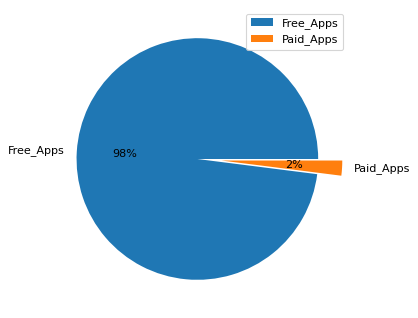

In [ ]:
plt.figure(figsize=(5,5), dpi=80)
plt.pie([len(Free_Apps),len(Paid_Apps)],labels=['Free_Apps','Paid_Apps'],explode=[0,0.2],autopct='%1.0f%%')
plt.legend()
plt.show()

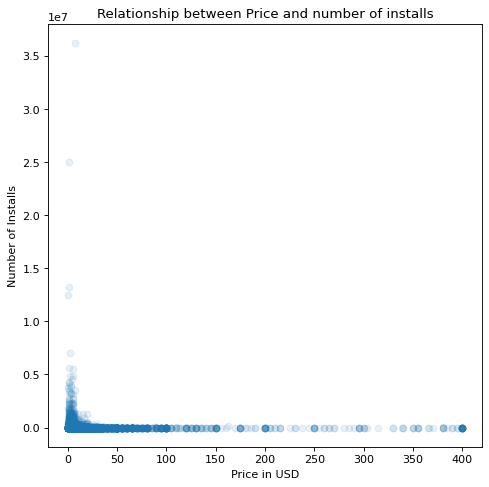

In [ ]:
plt.figure(figsize=(7,7), dpi=80)
plt.scatter(Paid_Apps['Price'],Paid_Apps['Maximum_Installs'],alpha=0.1)
plt.xlabel('Price in USD')
plt.ylabel('Number of Installs')
plt.title('Relationship between Price and number of installs')
plt.show()

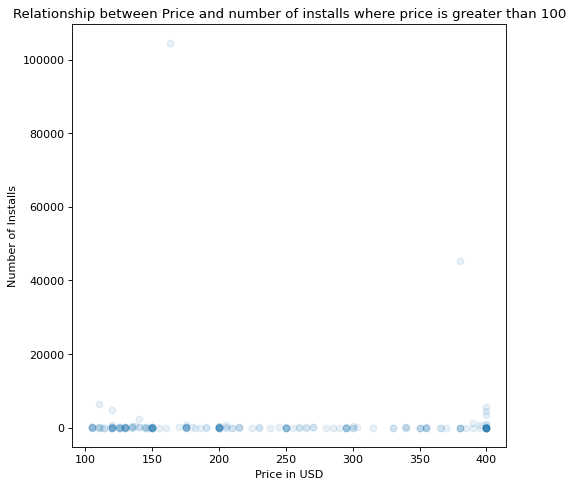

In [ ]:
plt.figure(figsize=(7,7), dpi=80)
plt.scatter(Paid_Apps.loc[Paid_Apps.Price>100]['Price'],Paid_Apps.loc[Paid_Apps.Price>100]['Maximum_Installs'],alpha=0.1)
plt.xlabel('Price in USD')
plt.ylabel('Number of Installs')
plt.title('Relationship between Price and number of installs where price is greater than 100')
plt.show()

In [ ]:
Paid_Apps.loc[Paid_Apps.Price>350]

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated
20081,TEST EGY,Tools,0.0,0.0,0,False,399.99,USD,16384.0,5,Marten Jack,Everyone,False,False,False,359.0,True
264384,Taxes,Business,0.0,0.0,0,False,399.99,USD,3481.6,2,business555,Teen,False,False,False,439.0,True
279825,Accounting Provider for Green Office Flow,Tools,0.0,0.0,0,False,399.99,USD,1433.6,3,AHMAD HUSNI,Everyone,False,False,False,1154.0,True
326380,Most Expensive Chat,Social,0.0,0.0,1,False,379.99,USD,3276.8,2,ExpensiveDev,Teen,False,False,False,400.0,False
429979,Most Expensive Note Taking App to Ever Exist,Tools,0.0,0.0,3,False,379.99,USD,2252.8,4,Kyle Cox,Everyone,False,False,False,732.0,False
523395,Presidential Election Campaign,Simulation,0.0,0.0,5,False,379.99,USD,65536.0,5,MarcLee,Everyone,False,False,False,261.0,True
527096,Nothing the app,Puzzle,0.0,0.0,0,False,379.99,USD,11264.0,4,Dark Thoughts Entertainment,Everyone,False,False,False,666.0,True
530127,MESH Connect,Productivity,0.0,0.0,25,False,400.00,USD,20480.0,4,Go Evo,Everyone,False,False,False,1378.0,True
552399,"Movies App - Latest, Upcoming, Popular Movies",Entertainment,4.4,5.0,27,False,354.99,USD,7680.0,5,Rams solanki,Everyone,False,False,False,648.0,True
625413,Challenge Impossible Ball for you,Arcade,5.0,6.0,4,False,399.99,USD,11264.0,4,Ibrahim Tornado,Everyone,False,False,False,463.0,True


From here we can see there are many apps having price 399.99

In [ ]:
import seaborn as sns

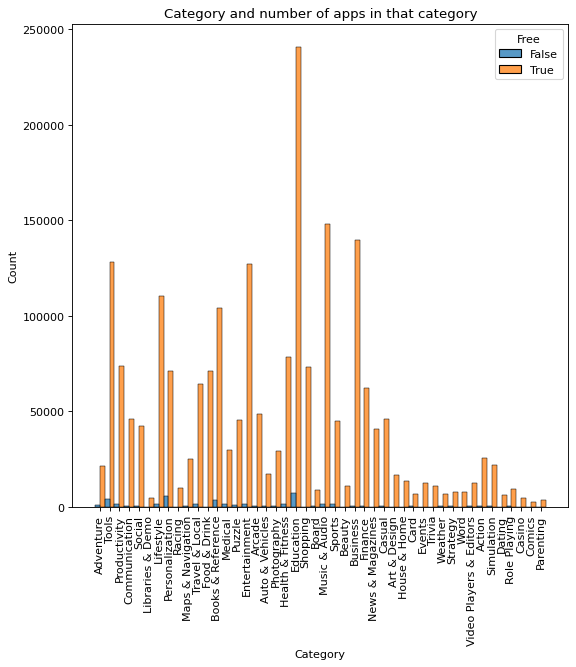

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
sns.histplot(data=df,x='Category',hue='Free',multiple="dodge")
plt.xticks(rotation = 90)
plt.title("Category and number of apps in that category")
plt.show()

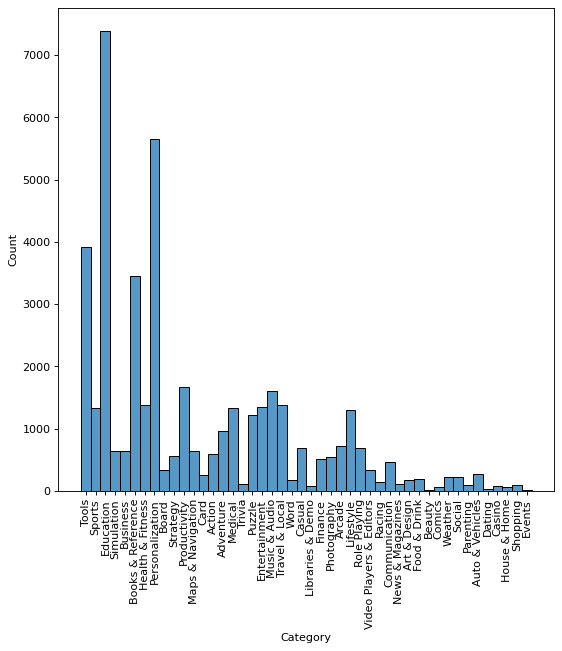

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
sns.histplot(data=Paid_Apps,x='Category')
plt.xticks(rotation = 90)
plt.show()

From Here we can see that for both free and paid apps education is dominating category

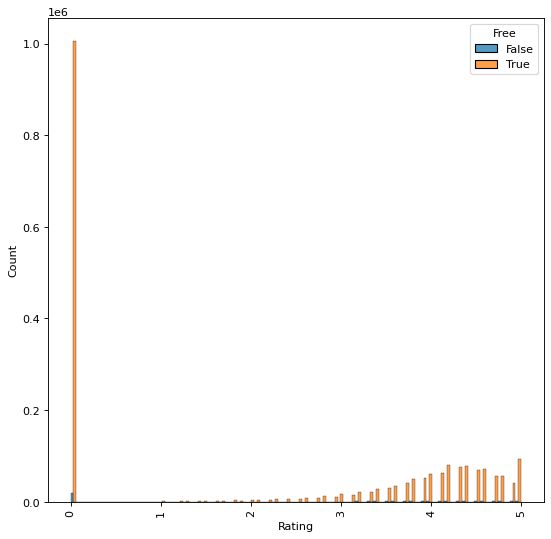

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
sns.histplot(data=df,x='Rating',hue='Free',multiple="dodge")
plt.xticks(rotation = 90)
plt.show()

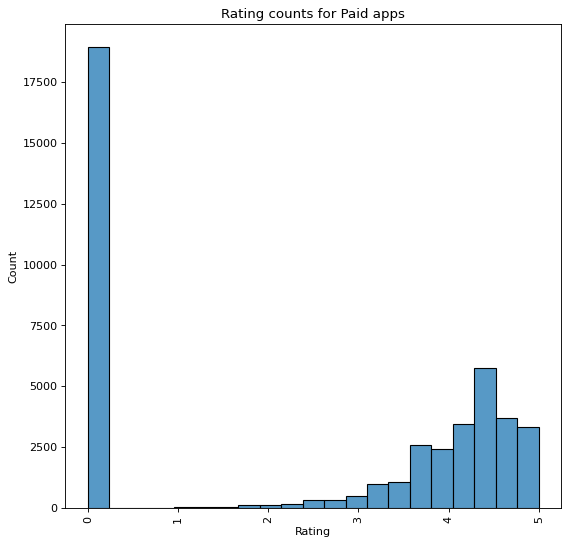

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
sns.histplot(data=Paid_Apps,x='Rating')
plt.xticks(rotation = 90)
plt.title("Rating counts for Paid apps")
plt.show()

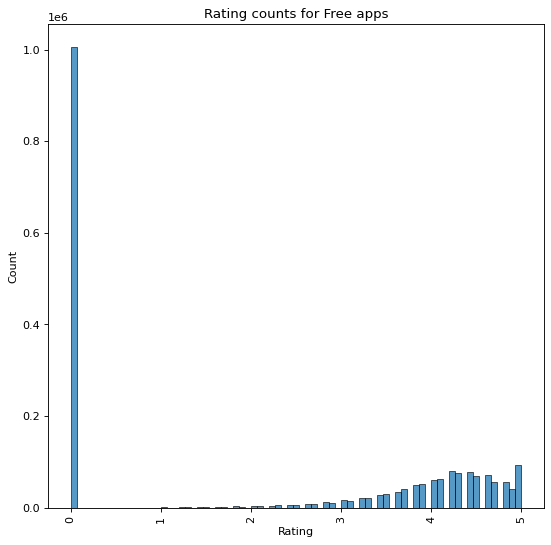

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
sns.histplot(data=Free_Apps,x='Rating')
plt.xticks(rotation = 90)
plt.title("Rating counts for Free apps")
plt.show()

0 is maximum number of ratings

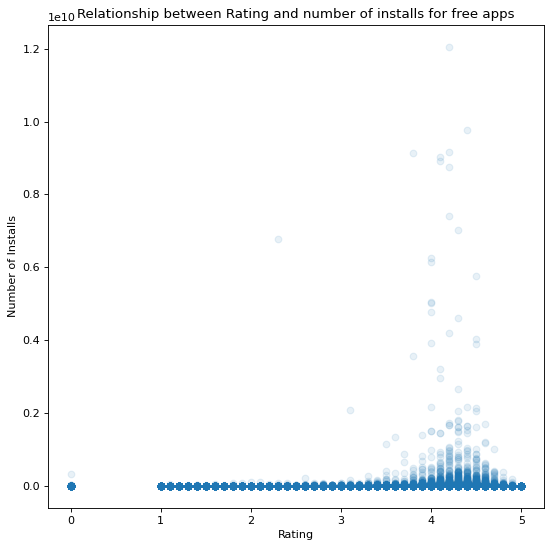

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(Free_Apps.Rating,Free_Apps.Maximum_Installs,alpha=0.1)
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.title('Relationship between Rating and number of installs for free apps')
plt.show()

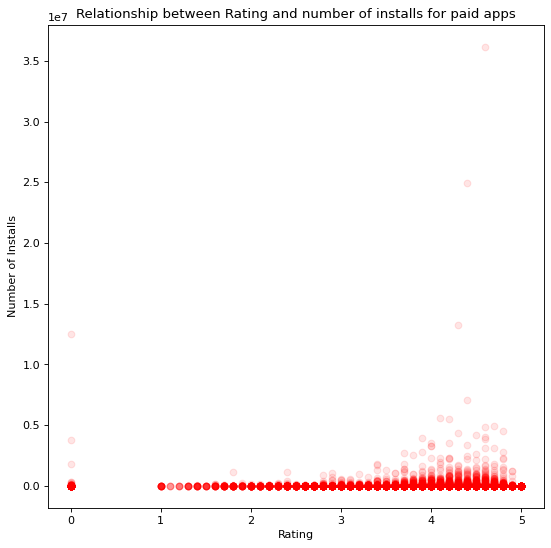

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(Paid_Apps.Rating,Paid_Apps.Maximum_Installs,alpha=0.1,c='r')
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.title('Relationship between Rating and number of installs for paid apps')
plt.show()

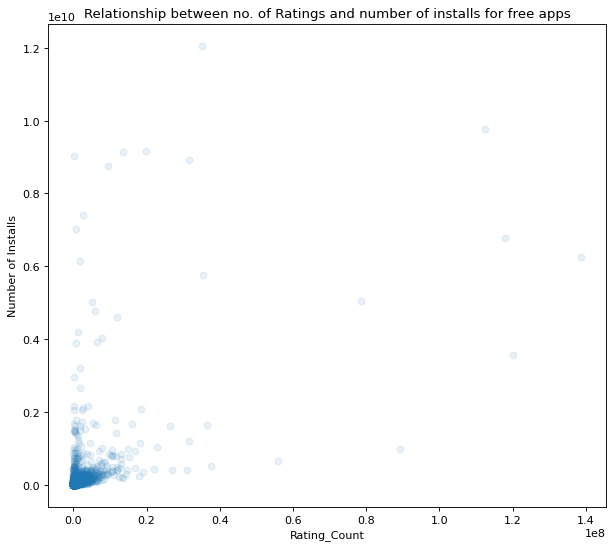

In [ ]:
plt.figure(figsize=(9,8), dpi=80)
plt.scatter(Free_Apps.Rating_Count,Free_Apps.Maximum_Installs,alpha=0.1)
plt.xlabel('Rating_Count')
plt.ylabel('Number of Installs')
plt.title('Relationship between no. of Ratings and number of installs for free apps')
plt.show()

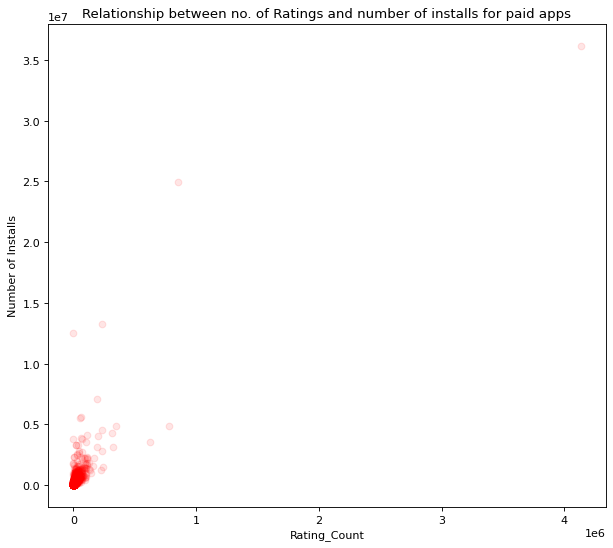

In [ ]:
plt.figure(figsize=(9,8), dpi=80)
plt.scatter(Paid_Apps.Rating_Count,Paid_Apps.Maximum_Installs,alpha=0.1,c='r')
plt.xlabel('Rating_Count')
plt.ylabel('Number of Installs')
plt.title('Relationship between no. of Ratings and number of installs for paid apps')
plt.show()

In [ ]:
df.head(2)

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,7,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,475.0,False
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2969.6,5,Webserveis,Everyone,True,False,False,390.0,True


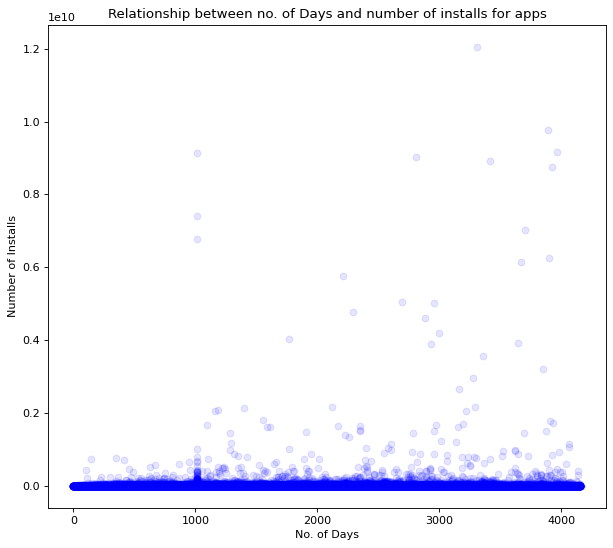

In [ ]:
plt.figure(figsize=(9,8), dpi=80)
plt.scatter(df.Days,df.Maximum_Installs,alpha=0.1,c='b')
plt.xlabel('No. of Days')
plt.ylabel('Number of Installs')
plt.title('Relationship between no. of Days and number of installs for apps')
plt.show()

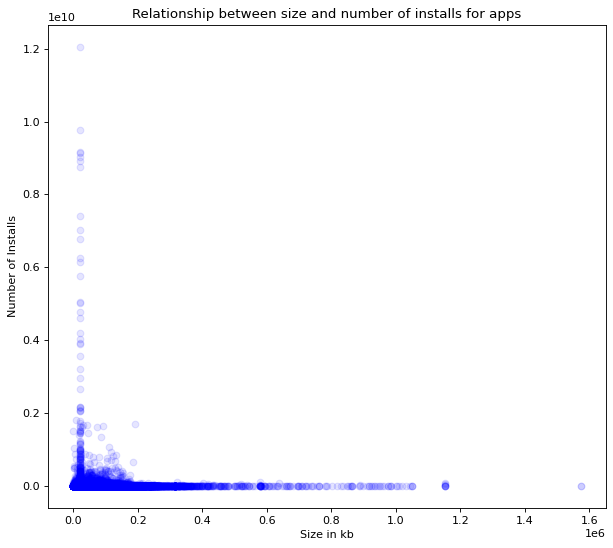

In [ ]:
plt.figure(figsize=(9,8), dpi=80)
plt.scatter(df.Size,df.Maximum_Installs,alpha=0.1,c='b')
plt.xlabel('Size in kb')
plt.ylabel('Number of Installs')
plt.title('Relationship between size and number of installs for apps')
plt.show()

In [ ]:
df.head(1)

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,7,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,475.0,False


In [ ]:
data_content = df.Content_Rating.value_counts()

In [ ]:
c_name=[]
c_value=[]
for a,b in data_content.items():
  c_name.append(a)
  c_value.append(b)

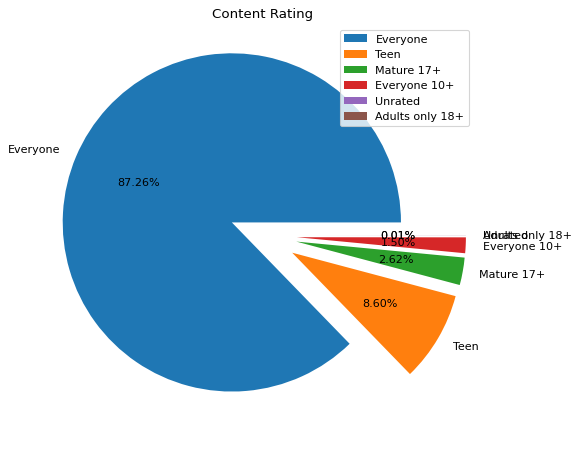

In [ ]:
plt.figure(figsize=(7,7), dpi=80)
plt.pie(c_value,labels=c_name,autopct='%0.2f%%',explode=[0.2,0.2,0.2,0.2,0.2,0.2])
plt.legend()
plt.title("Content Rating")
plt.show()

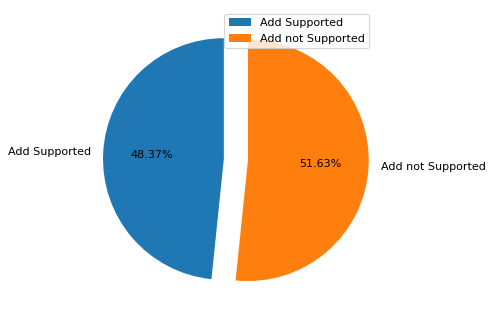

In [ ]:
plt.figure(figsize=(5,5), dpi=80)
plt.pie([len(df.Ad_Supported[df.Ad_Supported==True]),len(df.Ad_Supported[df.Ad_Supported==False])],labels=['Add Supported','Add not Supported'],explode=[0,0.2],autopct='%0.2f%%',startangle=90)
plt.legend()
plt.show()

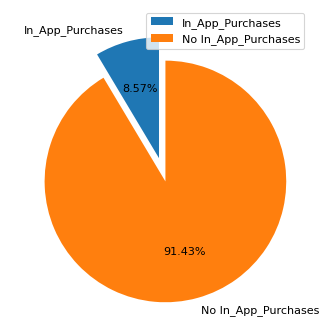

In [ ]:
plt.figure(figsize=(5,5), dpi=80)
plt.pie([len(df.Ad_Supported[df.In_App_Purchases==True]),len(df.Ad_Supported[df.In_App_Purchases==False])],labels=['In_App_Purchases','No In_App_Purchases'],explode=[0,0.2],autopct='%0.2f%%',startangle=90)
plt.legend()
plt.show()

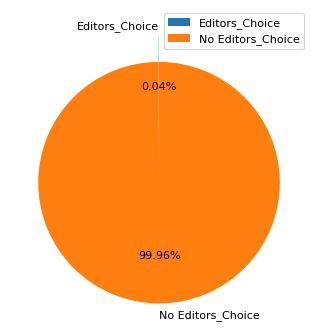

In [ ]:
plt.figure(figsize=(5,5), dpi=80)
plt.pie([len(df.Ad_Supported[df.Editors_Choice==True]),len(df.Ad_Supported[df.Editors_Choice==False])],labels=['Editors_Choice','No Editors_Choice'],explode=[0,0.2],autopct='%0.2f%%',startangle=90)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
c_name=[]
c_value=[]
for a,b in df.Developer_Id.value_counts()[:20].items():
  c_name.append(a)
  c_value.append(b)

In [ ]:
c_name

['Subsplash Inc',
 'TRAINERIZE',
 'ChowNow',
 'OrderYOYO',
 'Phorest',
 'BH App Development Ltd',
 'Sharefaith',
 'J&M Studio',
 'Flipdish',
 'CyJ Studio',
 'Apptegy',
 '+HOME by Ateam',
 'Branded Apps by MINDBODY',
 'Magzter Inc.',
 'Currency Converter X Apps',
 'echurch',
 'Skalpelis',
 'Virtuagym Professional',
 'Branded MINDBODY Apps',
 'FoodSoul']

In [ ]:
d = {'Developer_Id': c_name, 'Count_of_apps': c_value}

In [ ]:
developer_vs_apps = pd.DataFrame(d)

In [ ]:
developer_vs_apps

,Developer_Id,Count_of_apps
0,Subsplash Inc,5335
1,TRAINERIZE,5003
2,ChowNow,4816
3,OrderYOYO,2844
4,Phorest,2802
5,BH App Development Ltd,2373
6,Sharefaith,2027
7,J&M Studio,1942
8,Flipdish,1886
9,CyJ Studio,1741


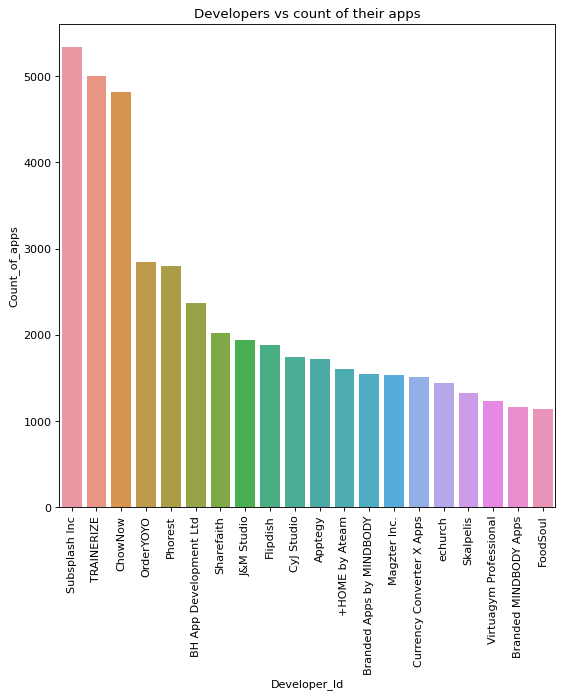

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
sns.barplot(data=developer_vs_apps,x='Developer_Id',y='Count_of_apps')
plt.xticks(rotation = 90)
plt.title("Developers vs count of their apps")
plt.show()

In [ ]:
df.head(1)

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,7,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,475.0,False


In [ ]:
Update_vs_installs = df.loc[:,['Updated','Maximum_Installs']].values

In [ ]:
d_i = {}
Update_vs_installs = np.array(Update_vs_installs)

In [ ]:
Update_vs_installs[0]

array([False, 15], dtype=object)

In [ ]:
false_values = 0
true_values = 0
for item in Update_vs_installs:
  if(item[0]==False):
    false_values = false_values+item[1]
  else:
    true_values = true_values+item[1]

In [ ]:
print(false_values,true_values)

3058810768 676312708117


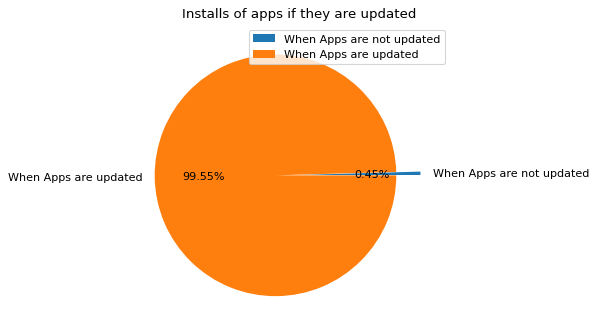

In [ ]:
plt.figure(figsize=(5,5), dpi=80)
plt.pie([false_values,true_values],labels=['When Apps are not updated','When Apps are updated'],explode=[0,0.2],autopct='%0.2f%%')
plt.legend()
plt.title('Installs of apps if they are updated')
plt.show()

In [ ]:
Free_Apps.head(2)

,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Developer_Id,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,7,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,False,475.0,False
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2969.6,5,Webserveis,Everyone,True,False,False,390.0,True


In [ ]:
Free_Apps_Needed_cols = Free_Apps.loc[:,[
                                         'Category',
                                         'Rating',
                                         'Rating_Count',
                                         'Size',
                                         'Minimum_Android',
                                         'Content_Rating',
                                         'Ad_Supported',
                                         'In_App_Purchases',
                                         'Editors_Choice',
                                         'Days',
                                         'Updated',
                                         'Maximum_Installs']]

In [ ]:
Paid_Apps_Needed_cols = Paid_Apps.loc[:,[
                                         'Category',
                                         'Rating',
                                         'Rating_Count',
                                         'Size',
                                         'Minimum_Android',
                                         'Content_Rating',
                                         'Ad_Supported',
                                         'In_App_Purchases',
                                         'Price',
                                         'Editors_Choice',
                                         'Days',
                                         'Updated',
                                         'Maximum_Installs'
]]

In [ ]:
Free_Apps_Needed_cols.head(2)

,Category,Rating,Rating_Count,Size,Minimum_Android,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated,Maximum_Installs
0,Adventure,0.0,0.0,10240.0,7,Everyone,False,False,False,475.0,False,15
1,Tools,4.4,64.0,2969.6,5,Everyone,True,False,False,390.0,True,7662


In [ ]:
Paid_Apps_Needed_cols.head(2)

,Category,Rating,Rating_Count,Size,Minimum_Android,Content_Rating,Ad_Supported,In_App_Purchases,Price,Editors_Choice,Days,Updated,Maximum_Installs
273,Tools,4.5,236.0,1638.4,4,Everyone,False,False,1.99,False,928.0,True,34125
296,Sports,2.8,160.0,30720.0,7,Everyone,False,False,4.99,False,1589.0,True,10407


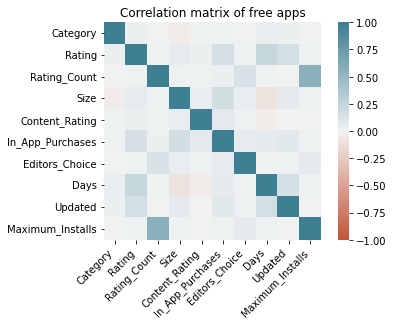

In [ ]:
corr = Free_Apps_Needed_cols.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Correlation matrix of free apps")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

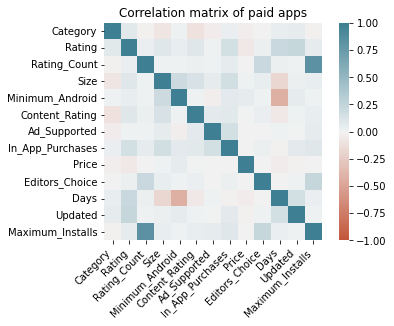

In [ ]:
corr = Paid_Apps_Needed_cols.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Correlation matrix of paid apps")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Rating,Rating_Count,Size,Minimum_Android,Ad_Supported,In_App_Purchases,Price,Editors_Choice,Days,Updated,Maximum_Installs
Rating,1.00,0.03,0.10,0.04,0.01,0.17,-0.05,0.03,0.22,0.23,0.05
Rating_Count,0.03,1.00,0.02,0.01,0.01,0.05,-0.00,0.22,0.03,0.01,0.83
Size,0.10,0.02,1.00,0.19,0.05,0.18,0.02,0.04,-0.17,0.03,0.04
Minimum_Android,0.04,0.01,0.19,1.00,-0.03,0.08,0.05,0.01,-0.43,0.06,0.02
Ad_Supported,0.01,0.01,0.05,-0.03,1.00,0.16,-0.00,-0.00,0.01,0.00,0.05
In_App_Purchases,0.17,0.05,0.18,0.08,0.16,1.00,-0.00,0.02,-0.01,0.07,0.10
Price,-0.05,-0.00,0.02,0.05,-0.00,-0.00,1.00,-0.00,-0.03,-0.02,-0.01
Editors_Choice,0.03,0.22,0.04,0.01,-0.00,0.02,-0.00,1.00,-0.00,0.01,0.24
Days,0.22,0.03,-0.17,-0.43,0.01,-0.01,-0.03,-0.00,1.00,0.17,0.03
Updated,0.23,0.01,0.03,0.06,0.00,0.07,-0.02,0.01,0.17,1.00,0.02


Here we can see price is very less depended on maximum number of installs

In [ ]:
corr = Free_Apps_Needed_cols.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Rating,Rating_Count,Size,Minimum_Android,Ad_Supported,In_App_Purchases,Editors_Choice,Days,Updated,Maximum_Installs
Rating,1.00,0.01,0.05,-0.07,0.17,0.15,0.02,0.24,0.16,0.01
Rating_Count,0.01,1.00,0.02,0.00,0.01,0.02,0.14,0.02,0.01,0.55
Size,0.05,0.02,1.00,0.24,-0.04,0.18,0.04,-0.10,0.07,0.01
Minimum_Android,-0.07,0.00,0.24,1.00,-0.15,0.03,0.01,-0.27,0.07,0.00
Ad_Supported,0.17,0.01,-0.04,-0.15,1.00,0.15,0.01,-0.04,-0.04,0.00
In_App_Purchases,0.15,0.02,0.18,0.03,0.15,1.00,0.05,0.07,0.08,0.02
Editors_Choice,0.02,0.14,0.04,0.01,0.01,0.05,1.00,0.02,0.01,0.07
Days,0.24,0.02,-0.10,-0.27,-0.04,0.07,0.02,1.00,0.17,0.02
Updated,0.16,0.01,0.07,0.07,-0.04,0.08,0.01,0.17,1.00,0.01
Maximum_Installs,0.01,0.55,0.01,0.00,0.00,0.02,0.07,0.02,0.01,1.00


We can drop Minimum_Android,Ad_Supported since they have no correlation

In [ ]:
Free_Apps_Needed_cols = Free_Apps_Needed_cols.drop(columns=['Ad_Supported','Minimum_Android'])

In [ ]:
corr = Free_Apps_Needed_cols.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Rating,Rating_Count,Size,In_App_Purchases,Editors_Choice,Days,Updated,Maximum_Installs
Rating,1.00,0.01,0.05,0.15,0.02,0.24,0.16,0.01
Rating_Count,0.01,1.00,0.02,0.02,0.14,0.02,0.01,0.55
Size,0.05,0.02,1.00,0.18,0.04,-0.10,0.07,0.01
In_App_Purchases,0.15,0.02,0.18,1.00,0.05,0.07,0.08,0.02
Editors_Choice,0.02,0.14,0.04,0.05,1.00,0.02,0.01,0.07
Days,0.24,0.02,-0.10,0.07,0.02,1.00,0.17,0.02
Updated,0.16,0.01,0.07,0.08,0.01,0.17,1.00,0.01
Maximum_Installs,0.01,0.55,0.01,0.02,0.07,0.02,0.01,1.00


In [ ]:
df_Free_apps = Free_Apps_Needed_cols
df_Paid_apps = Paid_Apps_Needed_cols

# Step 4: Building Models and Evaluation

## Encoding Data

In [ ]:
df_Free_apps.head()

,Category,Rating,Rating_Count,Size,Content_Rating,In_App_Purchases,Editors_Choice,Days,Updated,Maximum_Installs
0,Adventure,0.0,0.0,10240.0,Everyone,False,False,475.0,False,15
1,Tools,4.4,64.0,2969.6,Everyone,False,False,390.0,True,7662
2,Productivity,0.0,0.0,3788.8,Everyone,False,False,676.0,True,58
3,Communication,5.0,5.0,1843.2,Everyone,False,False,1009.0,True,19
4,Tools,0.0,0.0,6348.8,Everyone,False,False,480.0,True,478


In [ ]:
df_Paid_apps.head()

,Category,Rating,Rating_Count,Size,Minimum_Android,Content_Rating,Ad_Supported,In_App_Purchases,Price,Editors_Choice,Days,Updated,Maximum_Installs
273,Tools,4.5,236.0,1638.4,4,Everyone,False,False,1.99,False,928.0,True,34125
296,Sports,2.8,160.0,30720.0,7,Everyone,False,False,4.99,False,1589.0,True,10407
417,Tools,3.5,468.0,886.0,2,Everyone,False,False,0.99,False,3176.0,True,12019
554,Education,0.0,0.0,17408.0,4,Everyone,False,False,2.99,False,1553.0,False,2
618,Simulation,3.8,1158.0,36864.0,4,Everyone,True,True,0.99,False,224.0,True,23644


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import random

In [ ]:
labelEncoder_category = LabelEncoder()
labelEncoder_Content_Rating = LabelEncoder()

In [ ]:
labelEncoder_category.fit(df_Free_apps.Category.unique())

LabelEncoder()

In [ ]:
labelEncoder_Content_Rating.fit(df_Free_apps.Content_Rating.unique())

LabelEncoder()

In [ ]:
df_Free_apps.Category = labelEncoder_category.transform(df_Free_apps.Category)

In [ ]:
df_Paid_apps.Category = labelEncoder_category.transform(df_Paid_apps.Category)

In [ ]:
df_Free_apps.Content_Rating = labelEncoder_Content_Rating.transform(df_Free_apps.Content_Rating)
df_Paid_apps.Content_Rating = labelEncoder_Content_Rating.transform(df_Paid_apps.Content_Rating)

In [ ]:
df_Paid_apps.head()

,Category,Rating,Rating_Count,Size,Minimum_Android,Content_Rating,Ad_Supported,In_App_Purchases,Price,Editors_Choice,Days,Updated,Maximum_Installs
273,40,4.5,236.0,1638.4,4,1,False,False,1.99,False,928.0,True,34125
296,38,2.8,160.0,30720.0,7,1,False,False,4.99,False,1589.0,True,10407
417,40,3.5,468.0,886.0,2,1,False,False,0.99,False,3176.0,True,12019
554,15,0.0,0.0,17408.0,4,1,False,False,2.99,False,1553.0,False,2
618,36,3.8,1158.0,36864.0,4,1,True,True,0.99,False,224.0,True,23644


## Definition for Models

In [ ]:
def fit_predict(X,y):
  free_apps_dict = {}
  random_state = 0
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
  
  linear_regressor = LinearRegression()
  tree_regressor = DecisionTreeRegressor(random_state = random_state)
  forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
  xgb_regressor = XGBRegressor()
  
  linear_regressor.fit(X_train,y_train)
  tree_regressor.fit(X_train,y_train)
  forest_regressor.fit(X_train,y_train)
  xgb_regressor.fit(X_train,y_train)

  free_apps_dict["linear_regressor"] = [r2_score(y_train,linear_regressor.predict(X_train)),
                                        r2_score(y_test,linear_regressor.predict(X_test))]
  free_apps_dict["tree_regressor"] = [r2_score(y_train,tree_regressor.predict(X_train)),
                                        r2_score(y_test,tree_regressor.predict(X_test))]
  free_apps_dict["forest_regressor"] = [r2_score(y_train,forest_regressor.predict(X_train)),
                                        r2_score(y_test,forest_regressor.predict(X_test))]
  free_apps_dict["xgb_regressor"] = [r2_score(y_train,xgb_regressor.predict(X_train)),
                                        r2_score(y_test,xgb_regressor.predict(X_test))]

  ##--------For Log-------##
  y_train[y_train==0] = 1
  y_test[y_test==0] = 1
  y_train_log = np.log(y_train)
  y_test_log = np.log(y_test)
  linear_regressor_log = LinearRegression()
  tree_regressor_log = DecisionTreeRegressor(random_state = random_state)
  forest_regressor_log = RandomForestRegressor(n_estimators = 10, random_state = 0)
  xgb_regressor_log = XGBRegressor()

  linear_regressor_log.fit(X_train,y_train_log)
  tree_regressor_log.fit(X_train,y_train_log)
  forest_regressor_log.fit(X_train,y_train_log)
  xgb_regressor_log.fit(X_train,y_train_log)

  free_apps_dict["linear_regressor_log"] = [r2_score(y_train_log,linear_regressor_log.predict(X_train)),
                                        r2_score(y_test_log,linear_regressor_log.predict(X_test))]
  free_apps_dict["tree_regressor_log"] = [r2_score(y_train_log,tree_regressor_log.predict(X_train)),
                                        r2_score(y_test_log,tree_regressor_log.predict(X_test))]
  free_apps_dict["forest_regressor_log"] = [r2_score(y_train_log,forest_regressor_log.predict(X_train)),
                                        r2_score(y_test_log,forest_regressor_log.predict(X_test))]
  free_apps_dict["xgb_regressor_log"] = [r2_score(y_train_log,xgb_regressor_log.predict(X_train)),
                                        r2_score(y_test_log,xgb_regressor_log.predict(X_test))]

  return free_apps_dict


## Free Apps Models

In [ ]:
X = df_Free_apps.iloc[:, :-1].values
y = df_Free_apps.iloc[:, -1].values

In [ ]:
free_apps_dict_score = fit_predict(X,y)

[04:56:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
free_apps_dict_score

{'forest_regressor': [0.8727517545679825, -0.5081134029564398],
 'forest_regressor_log': [0.9437670747749328, 0.7663671994612612],
 'linear_regressor': [0.2728766624011951, 0.48104548381644097],
 'linear_regressor_log': [0.5000153949780792, 0.49946785706410246],
 'tree_regressor': [0.9999992579014108, 0.3618709148677898],
 'tree_regressor_log': [0.9786984476819991, 0.6297279123862244],
 'xgb_regressor': [0.7714440939082808, 0.42336417516016067],
 'xgb_regressor_log': [0.7877567412321768, 0.7872808872235045]}

In [ ]:
free_apps_score = pd.DataFrame(free_apps_dict_score)

In [ ]:
free_apps_score

,linear_regressor,tree_regressor,forest_regressor,xgb_regressor,linear_regressor_log,tree_regressor_log,forest_regressor_log,xgb_regressor_log
0,0.272877,0.999999,0.872752,0.771444,0.500015,0.978698,0.943767,0.787757
1,0.481045,0.361871,-0.508113,0.423364,0.499468,0.629728,0.766367,0.787281


In [ ]:
free_apps_score.to_csv("free_apps_score.csv")

In [ ]:
free_apps_score["Data"] = ["free_train","free_test"]

In [ ]:
first_column = free_apps_score.pop('Data')
free_apps_score.insert(0, 'Data', first_column)

In [ ]:
free_apps_score

,Data,linear_regressor,tree_regressor,forest_regressor,xgb_regressor,linear_regressor_log,tree_regressor_log,forest_regressor_log,xgb_regressor_log
0,free_train,0.272877,0.999999,0.872752,0.771444,0.500015,0.978698,0.943767,0.787757
1,free_test,0.481045,0.361871,-0.508113,0.423364,0.499468,0.629728,0.766367,0.787281


From This we can infer that XGBRegressor_log is performing best

In [ ]:
xgb_regressor_log = XGBRegressor()
y[y==0] = 1
y_log = np.log(y)
xgb_regressor.fit(X,y_log)


[05:40:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
def some_apps():
  for i in range(5):
    app_number = random.randint(1,len(X))
    app_255_x = X[app_number,:]
    app_255_x = np.array([app_255_x])
    print(y[app_number],np.exp(xgb_regressor.predict(app_255_x)))

In [ ]:
some_apps()

1271 [307.16824]
93 [113.050514]
206 [170.74928]
30 [104.18276]
8 [83.71936]


## Paid Apps Models

In [ ]:
X_paid = df_Paid_apps.iloc[:, :-1].values
y_paid = df_Paid_apps.iloc[:, -1].values

In [ ]:
paid_apps_dict_score = fit_predict(X_paid,y_paid)

[05:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
paid_apps_dict_score

{'forest_regressor': [0.9568047950832612, 0.24249988872210748],
 'forest_regressor_log': [0.9707692150782286, 0.8377678498348046],
 'linear_regressor': [0.7110031644358352, 0.4741721412872755],
 'linear_regressor_log': [0.6019988679089505, 0.6056843460769581],
 'tree_regressor': [0.9999927674852757, -1.9549258559220428],
 'tree_regressor_log': [0.997801558177712, 0.719730117898627],
 'xgb_regressor': [0.9326681682470351, 0.5367362055119753],
 'xgb_regressor_log': [0.8343174112196152, 0.831972700715978]}

In [ ]:
paid_apps_score = pd.DataFrame(paid_apps_dict_score)
paid_apps_score["Data"] = ["paid_train","paid_test"]
first_column = paid_apps_score.pop('Data')
paid_apps_score.insert(0, 'Data', first_column)

In [ ]:
paid_apps_score

,Data,linear_regressor,tree_regressor,forest_regressor,xgb_regressor,linear_regressor_log,tree_regressor_log,forest_regressor_log,xgb_regressor_log
0,paid_train,0.711003,0.999993,0.956805,0.932668,0.601999,0.997802,0.970769,0.834317
1,paid_test,0.474172,-1.954926,0.242500,0.536736,0.605684,0.719730,0.837768,0.831973


In [ ]:
paid_apps_score.to_csv("paid_apps_score.csv")

From Here we can infer that forest_regressor_log is performing best

In [ ]:
y_paid[y_paid==0] = 1
y_paid_log = np.log(y_paid)
forest_regressor_log = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest_regressor_log.fit(X_paid,y_paid_log)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
def some_apps_paid():
  for i in range(5):
    app_number = random.randint(1,len(X_paid))
    app_255_x = X_paid[app_number,:]
    app_255_x = np.array([app_255_x])
    print(y_paid[app_number],np.exp(forest_regressor_log.predict(app_255_x)))

In [ ]:
some_apps_paid()

327 [82.08338861]
473851 [504905.91715419]
7097 [5599.53277455]
422 [552.55728385]
162 [95.39591399]
